Shape of x_train is.....(18, 112800)
Shape of y_train is.....(18,)
Shape of x_test is.....(1, 112800)
Shape of y_test is......(1,)
Epoch 1/10
18/18 [==============================] - 1s 30ms/step - loss: 0.7369 - acc: 0.5000
Epoch 2/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6493 - acc: 0.6111
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6473 - acc: 0.6111
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6457 - acc: 0.6111
Epoch 5/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6444 - acc: 0.6111
Epoch 6/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6433 - acc: 0.6111
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6422 - acc: 0.6111
Epoch 8/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6413 - acc: 0.6111
Epoch 9/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6404 - acc: 0.6111
Epoch 10/10
1/1 [======

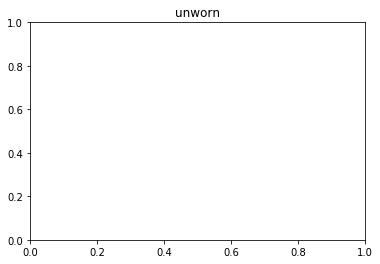

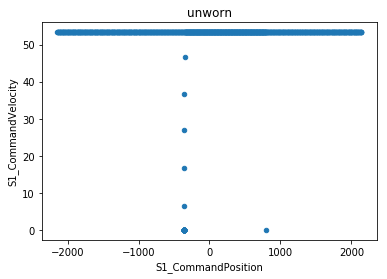

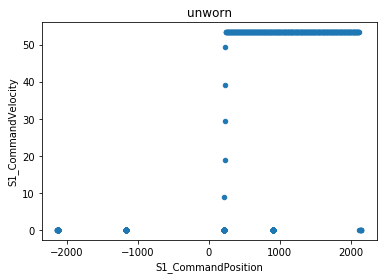

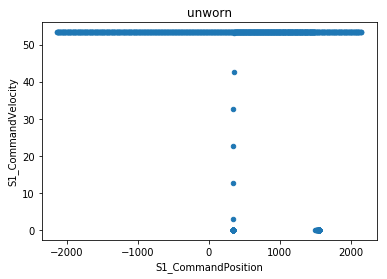

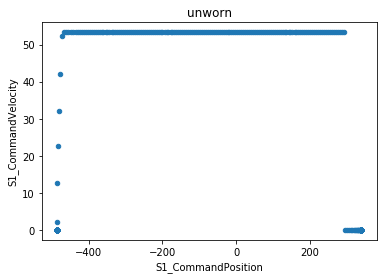

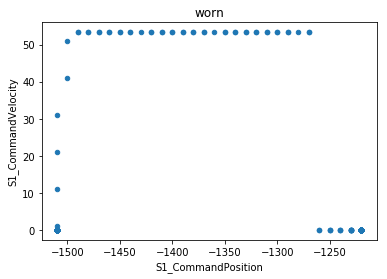

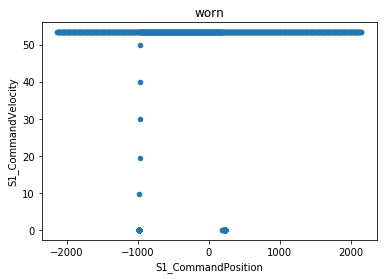

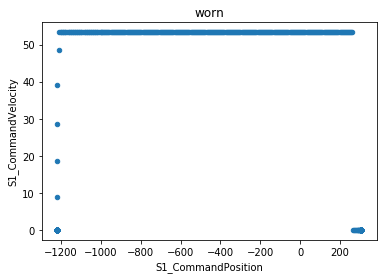

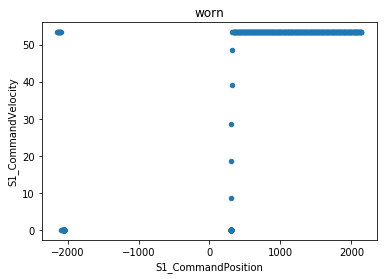

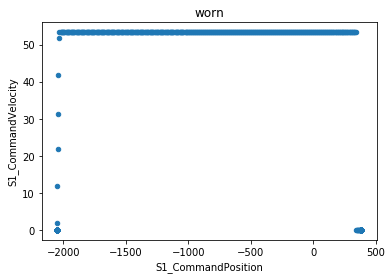

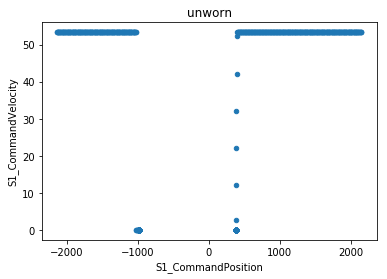

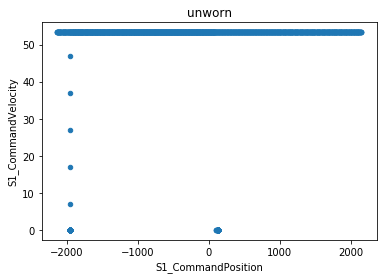

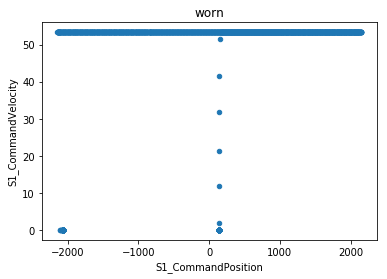

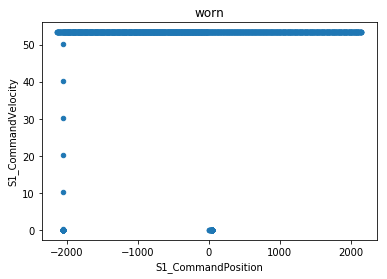

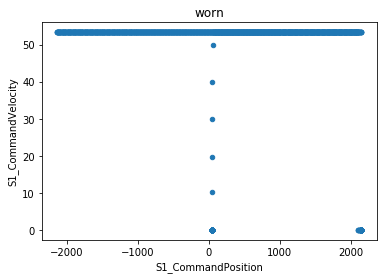

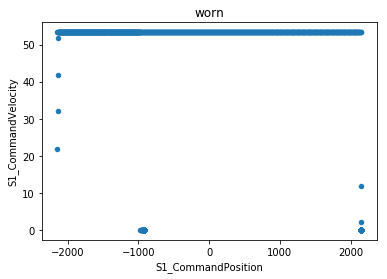

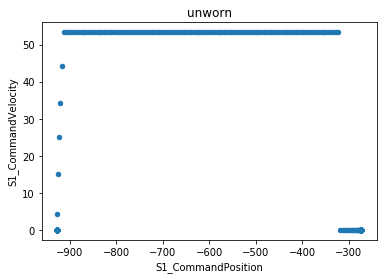

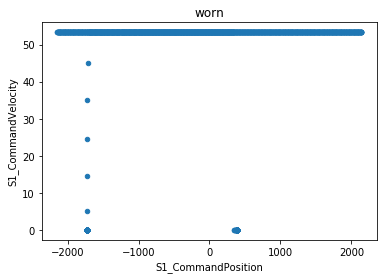

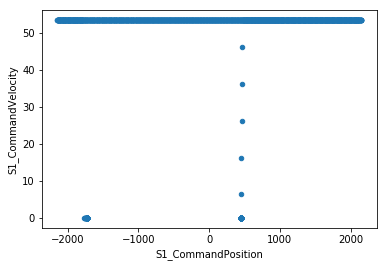

In [22]:
import pandas as pd
import scipy.io as sio
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np 
from numpy import array
import csv 
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation, Dense
import csv



class Spindle_Motor_Graphs():
    
    def __init__(self,files,conditions,m_f):
        self._conditions = conditions
        self._path = 0
        self._files = files
        self._machine_finalized = m_f
        
    def dataframe(self):
        
        df1 = pd.read_csv(self._path)
        df1 = pd.DataFrame(df1)
        #removing the last column which consist of words
        df1.drop(df1.columns[len(df1.columns)-1], axis=1, inplace=True)
        #Removing...
        for i in range(0,32):
            c = 0
            df1.drop(df1.columns[c],axis=1,inplace=True)
        for i in range(0,3):
            c=len(df1.columns)-1
            df1.drop(df1.columns[c],axis=1,inplace=True)
        return df1
    
    def graph(self):
        #labels
        l = {1: 'S1_ActualPosition', 2: 'S1_ActualVelocity',3:'S1_ActualAcceleration',4:'S1_CommandPosition',
           5:'S1_CommandVelocity',6:'S1_CommandAcceleration',7:'S1_CurrentFeedback',8:'S1_DCBusVoltage',
           9:'S1_OutputCurrent',10:'S1_OutputVoltage',11:'S1_OutputPower'}
        for i in range(0,len(self._files)):
            if self._conditions[i]=='worn':
                self._path = self._files[i]
                df = self.dataframe()
                plt.title('worn')
                df.plot(kind='scatter', x=l[4], y=l[5])
            elif self._conditions[i]=='unworn':
                self._path = self._files[i]
                df = self.dataframe()
                plt.title('unworn')
                df.plot(kind='scatter', x=l[4], y=l[5])
                
                              
"""Import train.csv"""
def create_csv_labels():
    data_header = []
    feed_rate = []
    clamp_pressure = []
    condition = []
    machine_finale = []
    visual_inspect = []
    with open('/Users/benjaminadame/desktop/train.csv', 'r') as csvfile:
        file = csv.reader(csvfile)
        file = list(file)
        data_header = file[0]
        #Delete the first two columns 
        for row in file:
            del row [0]
        for row in file:
            del row [0]
        #Establish the feed_rate and the clamp pressure and the rest of the labels
        for row in file:
            feed_rate.append(row[0])
            clamp_pressure.append(row[1])
            condition.append(row[2])
            machine_finale.append(row[3])
            visual_inspect.append(row[4])
            
        del feed_rate[0]
        del clamp_pressure[0]
        del condition[0]
        del machine_finale[0]
        del visual_inspect[0]
        
        for i in range(len(feed_rate)):
            feed_rate[i] = float(feed_rate[i])
            clamp_pressure[i] = float(clamp_pressure[i])
            
        return data_header,feed_rate,clamp_pressure,condition,machine_finale,visual_inspect
    
"""Fetching all the attributes from the worn csv file"""
def create_dataframe(full_path):
    rows = 2400
    df1 = pd.read_csv(full_path, header = None)
    df1 = pd.DataFrame(df1)
    df1.drop(df1.index[:1], inplace=True)
    df1.drop(df1.columns[len(df1.columns)-1], axis=1, inplace=True)
    df1 = df1.values
    new_rows = rows - df1.shape[0]
    df2 = np.zeros((new_rows,df1.shape[1]))
    df1 = np.vstack((df1,df2))
    df1 = df1.flatten()
    df1 = df1.T
    return df1

def create_train_inputs():
    
    data_header,feed_rate,clamp_pressure,condition,machine_finale,visual_inspect = create_csv_labels()
    files = os.listdir('/Users/benjaminadame/Desktop/cncproj')
    x_train = []
    y_train = []
    del files [0]
    for i in range(0,18):
        if condition[i] == 'worn' or condition[i] == 'unworn':
            files[i] = '/Users/benjaminadame/Desktop/cncproj' + '/' + files[i]
            path = files[i]
            df = create_dataframe(path)
            x_train.append(df)
            #Creating labels for the 18 experiments
            if condition[i] == 'worn':
                y_train.append(0)
            elif condition[i] == 'unworn':
                y_train.append(1) 
    x_train = array(x_train)
    y_train = array(y_train)
    print('Shape of x_train is.....' + str(x_train.shape))
    print('Shape of y_train is.....' + str(y_train.shape))
    return x_train,y_train

"""Creating an x and y test inputs, only one will do and one label"""
def create_test_inputs():
    path = '/Users/benjaminadame/Desktop/cncproj/experiment_01.csv'
    y_test = array([1])
    x_test = create_dataframe(path)
    x_test = x_test.reshape(1,-1)
    print('Shape of x_test is.....' + str(x_test.shape))
    print('Shape of y_test is......' + str(y_test.shape))
    
    return y_test,x_test


"""Training the model"""
def run_model(x_train,y_train,x_test,y_test):
    
    model = Sequential()
    model.add(Dense(5, input_shape = (112800,) ,activation = 'tanh'))
    model.add(Dense(3,activation = 'tanh'))
    model.add(Dense(2,activation = 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=18)
    score = model.evaluate(x_test, y_test, batch_size=1)
    
def list_dirs_labels():
    data_header,feed_rate,clamp_pressure,conditions,machine_finale,visual_inspect = create_csv_labels()
    files = os.listdir('/Users/benjaminadame/Desktop/cncproj')
    del files[0]
    #append directory name to files 
    for i in range(0,len(files)):
        files[i] = '/Users/benjaminadame/Desktop/cncproj'+'/' + files[i]
    return files,data_header,feed_rate,clamp_pressure,conditions,machine_finale,visual_inspect
    
    

if __name__ == "__main__":
    
    files,data_header,feed_rate,clamp_pressure,conditions,machine_finale,visual_inspect = list_dirs_labels()
    """Output graphs for worn and unworn spindle data"""
    mg = Spindle_Motor_Graphs(files,conditions,machine_finale)
    mg.graph()
    
    """Running model"""
    x_train,y_train = create_train_inputs()
    y_test, x_test = create_test_inputs()
    run_model(x_train,y_train,x_test,y_test)
    